## 통계적 추정

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

%precision 3

'%.3f'

In [3]:
df = pd.read_csv('./ch4_scores400.csv')
print(df.head())
scores = np.array(df['score'])
df.shape

   score
0     76
1     55
2     80
3     80
4     74


(400, 1)

In [4]:
# 모평균, 모분산
p_mean = np.mean(scores)
p_var = np.var(scores)
p_mean, p_var

(69.53, 206.6691)

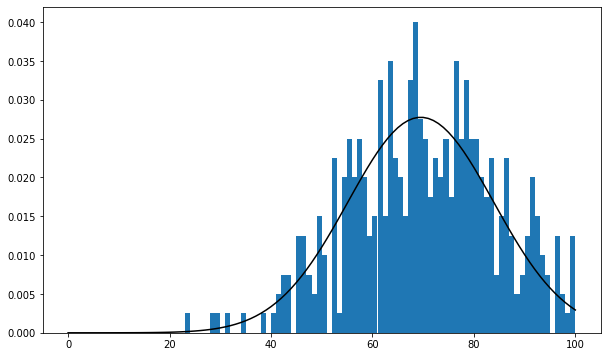

In [5]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

xs = np.arange(101)
rv = stats.norm(p_mean, np.sqrt(p_var))
ax.plot(xs, rv.pdf(xs), color='k')
ax.hist(scores, bins=100, range=(0,100), density=True)

plt.show()

In [6]:
# A학생이 무작위 추출한 표본 크기가 20인 표본
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
sample

array([49, 60, 72, 86, 52, 61, 77, 91, 80, 56, 69, 67, 90, 56, 75, 79, 60,
       79, 68, 81], dtype=int64)

In [7]:
# 표본크기가 20인 표본 10000개 추출
np.random.seed(1111)
n_samples = 10000
samples = np.random.choice(scores, (n_samples, n))

### 점추정
- 모평균이나 모분산 등의 모수를 하나의 수치로 추정
- 추정량의 기댓값이 추측하려는 모수가 되는 성질을 불편성(편향성)이라고 하며 불편성을 가진 추정량을 불편추정량이라고 한다.
- 표본평균이 모평균을 잘 추정할 수 있는 근거 중 하나가 바로 이 불편성이다.
- 표본크기 n을 증가시키면 추측하기 원하는 모수에 수렴해가는 성질을 일치성이라고 하며 일치성을 지닌 추정량을 일치추정량이라고 함
- 표본평균은 불편성과 일치성을 모두 가지고 있기 때문에 모평균을 잘 추정한다고 말할 수 있다.


In [8]:
df = pd.read_csv('./ch4_scores400.csv')
print('보평균:',df.score.mean())

np.random.seed(1111)
n = 20
n_samples = 10000
samples = np.random.choice(scores, (n_samples,n))

sample_means = np.mean(samples, axis=1)

print('모분산:', df.score.var())
sample_u_vars = np.var(samples, axis=1, ddof=1)
print('표본분산, 분산 :', np.mean(sample_means), np.mean(sample_u_vars))

보평균: 69.53
모분산: 207.18706766917293
표본분산, 분산 : 69.53799999999998 206.67808263157895


In [9]:
# 표본평균의 평균
sample_means = np.mean(samples, axis=1)
np.mean(sample_means)

69.53799999999998

In [10]:
# 표본크기를 백만으로 할 때의 표본평균
np.mean(np.random.choice(scores,int(1e6)))

69.542954

In [11]:
# A학생이 추출한 표본의 표본평균
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
s_mean = np.mean(sample)
s_mean

70.4

In [12]:
np.var(scores)

206.6691

In [13]:
# 표본분산이 모분산의 불편추정량이 되는지 대수법칙으로 확인
sample_vars = np.var(samples, axis=1)
np.mean(sample_vars)

196.34417850000003

In [14]:
#  대수의 법칙 사용해서 불편분산의 기대값 확인하기
sample_u_vars = np.var(samples, axis=1, ddof=1)
np.mean(sample_u_vars)

206.67808263157895

In [15]:
# 표본크기 100만으로 확인하기
np.var(np.random.choice(scores, int(1e6)), ddof=1)

207.12823418906518

### 구간추정

#### 정규분포의 모평균 구간추정 : 모분산을 알고 있는 경우

In [24]:
# A학생이 추출한 표본의 표본평균
np.random.seed(0)
n=20
sample = np.random.choice(scores,n)
s_mean = np.mean(sample)
s_mean

# A 학생 추출한 표본으로 불편분산 계산
u_var = np.var(sample, ddof=1)
u_var

158.25263157894742

In [23]:
# A학생 표본 데이터로 모평균의 95% 신뢰구간 구하기
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(p_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(p_var/n)

lcl, ucl

(64.09956018535247, 76.70043981464754)

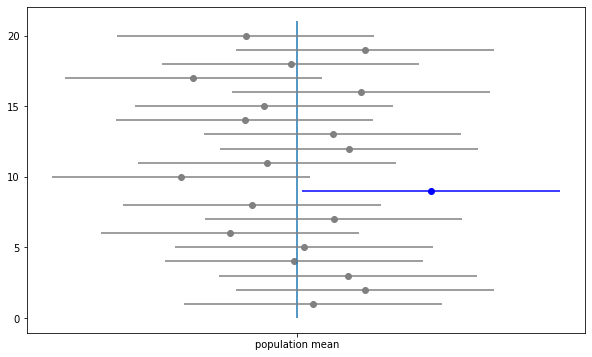

In [25]:
# 신뢰구간의 계산 20번 수행하고 모평균을 몇번 포함하는지 그리기 ( 중앙 세로선 평균, 모평균 모함하지 않은 구간추정은 다른 색)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

rv = stats.norm()
n_samples = 20
ax.vlines(p_mean, 0,21)
for i in range(n_samples):
    sample_ = samples[i]
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        ax.scatter(s_mean_, n_samples-i, color='gray')
        ax.hlines( n_samples-i, lcl, ucl, color='gray')
    else:
        ax.scatter(s_mean_, n_samples-i, color='b' )
        ax.hlines(n_samples-i, lcl, ucl, color='b' )
ax.set_xticks([p_mean])
ax.set_xticklabels(['population mean'])

plt.show()

In [29]:
# 신뢰구간을 1만 번 계산하고 모평균이 포함된 것은 몇 %인지 시뮬레이션 으로 알아보기
rv = stats.norm()
cnt = 0

for sample_ in samples:
    s_mean_ = np.mean(sample_)
    lcl = s_mean_ - rv.isf(0.025) * np.sqrt(p_var/n)
    ucl = s_mean_ - rv.isf(0.975) * np.sqrt(p_var/n)
    if lcl <= p_mean <= ucl:
        cnt += 1
cnt / len(samples)

0.951

#### 정규분포의 모분산 구간추정(모평균을 모름)

In [30]:
sample_y = sample_u_vars * (n-1) / p_var
sample_y

array([11.303, 15.767, 18.102, ..., 19.435,  9.265, 18.625])

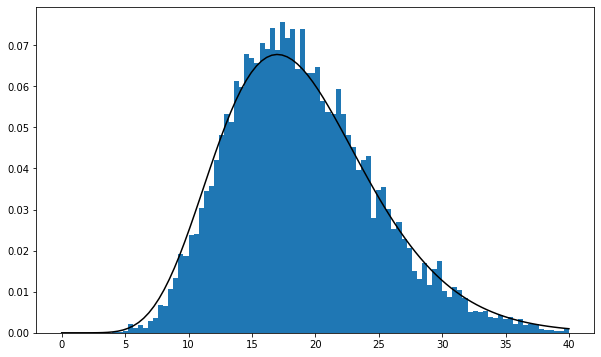

In [33]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

xs = np.linspace(0, 40, 100)
rv = stats.chi2(df=n-1)
ax.plot(xs, rv.pdf(xs), color='k')
hist, _, _ = ax.hist(sample_y, bins=100,
                     range=(0, 40), density=True)

plt.show()

In [34]:
rv = stats.chi2(df=n-1)
lcl = (n-1) * u_var / rv.isf(0.025)
hcl = (n-1) * u_var / rv.isf(0.975)

lcl, hcl

(91.52471947132238, 337.5955129124592)

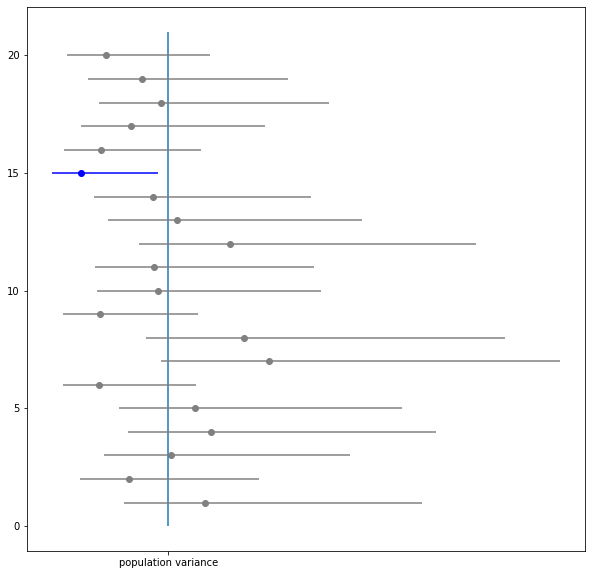

In [35]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

rv = stats.chi2(df=n-1)
n_samples = 20
ax.vlines(p_var, 0, 21)
for i in range(n_samples):
    sample_ = samples[i]
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        ax.scatter(u_var_, n_samples-i, color='gray')
        ax.hlines(n_samples-i, lcl, ucl, 'gray')
    else:
        ax.scatter(u_var_, n_samples-i, color='b')
        ax.hlines(n_samples-i, lcl, ucl, 'b')
ax.set_xticks([p_var])
ax.set_xticklabels(['population variance'])

plt.show()

In [36]:
rv = stats.chi2(df=n-1)
cnt = 0
for sample_ in samples:
    u_var_ = np.var(sample_, ddof=1)
    lcl = (n-1) * u_var_ / rv.isf(0.025)
    ucl = (n-1) * u_var_ / rv.isf(0.975)
    if lcl <= p_var <= ucl:
        cnt += 1
        
cnt / len(samples)

0.964

#### 정규분포의 모평균(모분산을 알지 못하는) 구간추정

In [37]:
rv = stats.t(df=n-1)
lcl = s_mean - rv.isf(0.025) * np.sqrt(u_var/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(u_var/n)

lcl, ucl

(65.31244886603886, 77.08755113396114)

#### 베르누이 분포의 모평균의 구간추정

In [39]:
enquete_df = pd.read_csv('./ch10_enquete.csv')
enquete = np.array(enquete_df['known'])
n = len(enquete)
enquete[:10]

array([1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [40]:
s_mean = enquete.mean()
s_mean

0.709

In [41]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean*(1-s_mean)/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean*(1-s_mean)/n)

lcl, ucl

(0.6808474522924337, 0.7371525477075662)

#### 포아송 분포의 모평균의 구간추정

In [42]:
n_access_df = pd.read_csv('./ch10_access.csv')
n_access = np.array(n_access_df['access number'])
n = len(n_access)
n_access[:10]

array([10, 11,  9,  9, 18, 13,  4, 10, 10,  8], dtype=int64)

In [43]:
s_mean = n_access.mean()
s_mean

10.444444444444445

In [44]:
rv = stats.norm()
lcl = s_mean - rv.isf(0.025) * np.sqrt(s_mean/n)
ucl = s_mean - rv.isf(0.975) * np.sqrt(s_mean/n)

lcl, ucl

(9.697953549598202, 11.190935339290688)

#### 과제 0905_1
p266 ~ p291 예제 코드를 풀어보세요.

#### 과제 0905_2
- 다음 용어를 예를들어 설명하세요.
  불편성, 일치성, 불편분산,
- 카이제곱분포,t분포가 구간 추정에 활용된 사례를 만들어 설명하세요.
 

- 불편성:  표본으로부터 구한 통계량의 기대치가 추정하려 하는 모수의 실제 값에 같거나 가까워지는 성질을 의미.
- 일치성 : 표본의 크기가 커감에 따라서 표본의 통계량이 모집단의 모수와 일치하게 될 경우

## 통계적 가설검정

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
from scipy import stats
%precision 3

'%.3f'

In [4]:
# 감자튀김의 무게 데이터 (2주동안 의 구매한 데이터 (표본))
df = pd.read_csv('./ch11_potato.csv')
sample = np.array(df['무게'])
print(df.head())
print(len(df))

       무게
0  122.02
1  131.73
2  130.60
3  131.82
4  132.05
14


In [5]:
# 14개의 표본평균
s_mean = np.mean(sample)
s_mean

128.451

### 통계적 가설검정이란 296p
모집단의 모수에 관하여 두가지 가설을 세우고 표본으로부터 계산되는 통계량을 이용하여 어느 가설이 옳은지 판단하는 통계적인 방법
- 검정통계량 vs 임곗값
- p값 vs 유의수준

In [24]:
# 모평균이 알려진 감자튀김 무게 평균 130g 보다 작은지 여부(모집단이 정규분포를 따르고 모분산은 9)
rv = stats.norm(130, np.sqrt(9/14))
print(rv.mean(), rv.std(),'\n')
print(rv.rvs(10),'\n')
#임계값
rv.isf(0.95)

130.0 0.8017837257372732 

[129.136 128.744 129.79  129.1   130.178 130.036 129.306 130.748 130.547
 130.607] 



128.681

<bound method _AxesBase.set_ylim of <AxesSubplot:xlabel='x', ylabel='pdf'>>

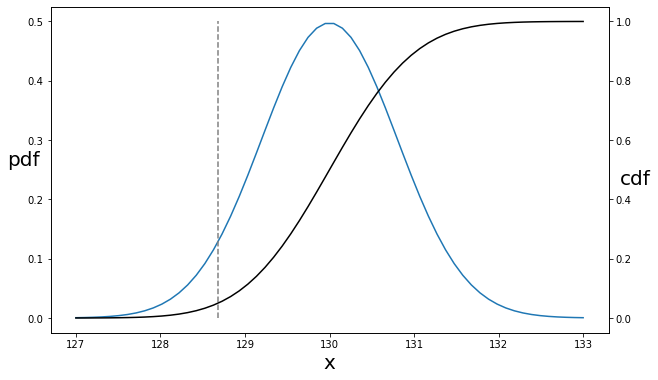

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
xs = np.linspace(127,133,60)

ax1.plot(xs,rv.pdf(xs))
ax2.plot(xs,rv.cdf(xs),color='black')
ax1.vlines(rv.ppf(0.05), 0,0.5, color='gray',ls='--')
ax1.set_xlabel("x",fontsize=20)
ax1.set_ylabel('pdf',rotation=0,fontsize=20)
ax2.set_ylabel('cdf',rotation=0,fontsize=20)
ax1.set_ylim


In [20]:
# 검정통계량 z : 표본평균을 표준화
z = (s_mean -130) / np.sqrt(9/14)
z

-1.932

In [21]:
# 임계값 128.68
rv = stats.norm()
rv.isf(0.95)

-1.645

In [23]:
# 검정통계량으로 부터 p값 산출
# P값이 유의수준 0.05보다 작으므로 귀무가설 기각
rv.cdf(z)

0.027

### 단측검정과 양측검정
귀무가설 : 감자튀김의 무게는 130g이다.
- 단측검정 : 감자튀김의 무게가 130g보다 작다를 대립가설로 수행
- 양측검정 : 감자튀김의 무게는 130g이 아니다를 대립가설로 수행


In [26]:
# 양측검정 시
z = (s_mean -130) / np.sqrt(9/14)
rv = stats.norm()
rv.interval(0.95)

(-1.960, 1.960)

In [29]:
# 양쪽 구하는거라 p값 2배
rv.cdf(z)*2
# 결론 p값 유의수준 0.05보다 크다. 그래서 귀무가설은 기각되지 않는다.

0.053

### 가설검정에서의 두 가지 오류
- 제1종 오류 : 귀무가설이 옳을 때 귀무가설을 기각하는 오류
  - '실제로 평균이 130g'인데도 평균은 130g 보다 작다라는 결론을 내리는 상황 
- 제2종 오류 : 대립가설이 옳을 때 귀무가설을 채택하는 오류
  - '모평균은 130g 보다 작다'인데도 모평균은 130g 보다 작다라는 결론을 얻을 수 없는 비율
- 통계적 가설검정에서는 제1종 오류는 제어할 수 있지만 제2종 오류는 제어할 수 없는 비대칭성이 있다.


#### 제1종 오류

In [32]:
# 실제 평균 130, 모집단의 확률분포 N(130,3^2)
rv = stats.norm(130,3)

In [46]:
# 모집단에서 14개의 표본 추출하여 가설검정 작업을 10000번 하고 
# 제1종오류 범하는 비율 (평균이 130인데 평균은 130보다 작다라는 결론 내리는 비율)
c = stats.norm().isf(0.95)
print('임계값:', c)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z < c:    # 검정통계량 < 임계값
        cnt+=1
cnt / n_samples
# 제 1종 오류를 범하는 확률을 위험률 이라고 함
#(위험률은 유의수준과 일치, 그래서 분삭가가 제어할수 있는 확률)

임계값: -1.6448536269514722


0.051

#### 제2종 오류

In [47]:
# 모집단의 평균을(128) 알고 있다 가정 그럼 모집단의 확률분포 N(128,3^2)
rv = stats.norm(128,3)

In [48]:
# 130보다 작다 결론을 얻을 수 없는 비율 계산
c = stats.norm().isf(0.95)
n_samples = 10000
cnt = 0
for _ in range(n_samples):
    sample_ = np.round(rv.rvs(14), 2)
    s_mean_ = np.mean(sample_)
    z = (s_mean_ - 130) / np.sqrt(9/14)
    if z >= c:
        cnt += 1
cnt / n_samples
# 2종 오류를 범하는 확률에는 기호 (베타)β를 사용 1-β를 검정력(power)이라고 부른다.
# β는 분석가가 제어할 수 없는 확률

0.201

#### 과제 0907_1
p308- 331 예제풀기(윌콕슨, 만위트니는 제외)

#### 카이제곱검정
- 독립성 검정이란 두 변수 'X,Y에 관해서 X와 Y가 독립이다.'라는 귀무가설과 'X,Y에 관해서 X와 Y가 독립이 아니다.'라는 대립가설에 의해 수행되는 검정
- 독립성 검정에 카이제곱분포가 사용되기 때문에 카이제곱검정이라고도 부른다.
- 광고A와 광고B간의 구입 비율에 유의한 차이가 있는지 확인하는 경우 사용할 수 있음.


In [49]:
ad_df = pd.read_csv('./ch11_ad.csv')
n = len(ad_df)
print(n)
ad_df.head()

1000


,광고,구입
0,B,하지 않았다
1,B,하지 않았다
2,A,했다
3,A,했다
4,B,하지 않았다


In [50]:
# 교차집계표 crosstable 작성 
ad_cross = pd.crosstab(ad_df['광고'], ad_df['구입'])
ad_cross

구입,하지 않았다,했다
광고,,
A,351,49
B,549,51


In [51]:
# a 와 b광고 구입 비율 확인
ad_cross['했다']/(ad_cross['했다']+ad_cross['하지 않았다'])

광고
A    0.1225
B    0.0850
dtype: float64

In [55]:
# 카이제곱검정 수행 (몇가지 준비)- 구입한사람 합, 하지않은사람 합, a광고 본사람 합, b광고 본사람 합
# 구매 여부 합
n_not, n_yes = ad_cross.sum()
n_not, n_yes

(900, 100)

In [54]:
# a b 광고 본사람들의 각 합
n_adA, n_adB = ad_cross.sum(axis=1)
n_adA, n_adB

(400, 600)

In [56]:
# 기대도수 계산
ad_ef = pd.DataFrame({'했다': [n_adA * n_yes/ n,
                            n_adB * n_yes / n],
                     '하지 않았다' : [n_adA * n_not / n,
                                   n_adB * n_not / n]},
                    index=['A', 'B'])
ad_ef

,했다,하지 않았다
A,40.0,360.0
B,60.0,540.0


In [57]:
# 기대도수와 관측도수의 차이를 측정함으로써 검정 수행
y = ((ad_cross - ad_ef) ** 2 / ad_ef).sum().sum()
y

3.750

In [60]:
# Y는 자유도가 1인 카이제곱분포를 근사적으로 따른다. p값 구하기
# 귀무가설은 채택되고 광고 A와 광고B에 유의한 차이가 인정되지 않는다.
rv = stats.chi2(1)
1-rv.cdf(y)

0.053

In [64]:
# scipy.stats 에서 chi2_contingency 함수를 사용 계산
# 이 함수의 반환값은 - 검정통계량, p값, 자유도, 기대도수(ef)
chi2, p, dof, ef = stats.chi2_contingency(ad_cross,
                                         correction=False)
chi2, p, dof

(3.750, 0.053, 1)

In [63]:
ef

array([[360.,  40.],
       [540.,  60.]])

#### 과제 0907_2
카이제곱 검정을 이용항여 독립성 검정을 수행하는 사례를 작성하여 설명하세요.

In [29]:
from scipy import stats
import pandas as pd
import numpy as np

%precision 3

'%.3f'

In [22]:
# 콜라를 버거A세트 B세트에서 다른음료로 바꾸지 않고 먹었는지  
data1 = {'먹다' : [35,75], '안먹다' : [43,88]}
df = pd.DataFrame(data1,index=['A','B'])
df

,먹다,안먹다
A,35,43
B,75,88


In [23]:
# A와 B세트의 콜라 선택 비율
df['먹다']/(df['먹다']+df['안먹다'])

A    0.448718
B    0.460123
dtype: float64

In [27]:
# 선택 여부 합
eat, n_eat = df.sum()
eat, n_eat

(110, 131)

In [28]:
# a b 세트를 고른사람 각 합
A, B = df.sum(axis=1)
A, B

(78, 163)

In [32]:
chi2, p, dof, ef = stats.chi2_contingency(df, correction=False)
chi2, p, dof  # 검정통계량, p값 , 자유도
# 귀무가설 채택 a,b세트는 차이가 인정되지 않는다.

(0.028, 0.868, 1)

In [31]:
ef

array([[35.602, 42.398],
       [74.398, 88.602]])